Silhouette random_state = 0 : 0.11362027575179431
Purity random_state = 0 : 0.7671957671957672
Silhouette random_state = 1 : 0.11403554201377074
Purity random_state = 1 : 0.7632275132275133
Silhouette random_state = 2 : 0.11362027575179431
Purity random_state = 2 : 0.7671957671957672


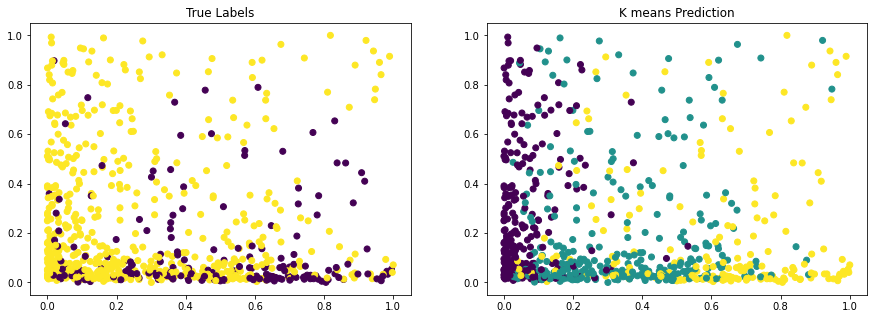

31


In [ ]:

import pandas as pd
from sklearn import datasets, metrics, cluster, mixture
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = loadarff('/content/pd_speech.arff')
df = pd.DataFrame(data[0])

X = df.drop('class', axis=1)
X = MinMaxScaler().fit_transform(X)
y_true = df['class']

seeds = [0,1,2]
def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

for i in seeds:
  # parameterize clustering
  kmeans_algo = cluster.KMeans(n_clusters=3, random_state=i)

  # learn the model
  kmeans_model = kmeans_algo.fit(X)

  # return centroids
  kmeans_model.cluster_centers_

  y_pred = kmeans_model.labels_
  print("Silhouette random_state =",i,":",metrics.silhouette_score(X, y_pred))
  print("Purity random_state =",i,":",purity_score(y_true, y_pred))


variances = np.var(X, axis=0)
index_most = np.argsort(variances)[::-1]
Most_informative = X[:,index_most[:2]]

fit, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(Most_informative[:,0], Most_informative[:,1], c=y_true)
ax[0].set_title('True Labels')
ax[1].scatter(Most_informative[:,0], Most_informative[:,1], c=y_pred)
ax[1].set_title('K means Prediction')
plt.show()

pca = PCA(n_components=0.8)
pca.fit(X)
print(pca.n_components_)

